In [1]:
import numpy as nm      
import pandas as pd    
import matplotlib.pyplot as mtp 

In [4]:
ds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/coteq_electricity_2020.csv')
ds

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19,89,95,89,1x35,3810,89,89
1,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,40,100,98,78,1x35,2637,95,83
2,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16,100,100,100,1x35,1366,100,94
3,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,41,93,85,54,3x25,5101,93,78
4,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14,86,100,36,1x25,4315,100,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Loofgang,7609ZR,7609ZR,ALMELO,29,66,100,83,1x35,3779,100,93
2571,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Vista,7609ZS,7609ZS,ALMELO,25,60,100,76,1x35,4715,96,88
2572,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Tuinvaas,7609ZT,7609ZT,ALMELO,18,44,100,94,1x35,3798,100,61
2573,Cogas Infra & Beheer BV,Netbeheerder Centraal Overijssel B.V.,Wintertuin,7609ZV,7609ZW,ALMELO,45,62,100,89,1x35,3455,100,89


In [5]:
x = ds.iloc[:, [12, 13]].values


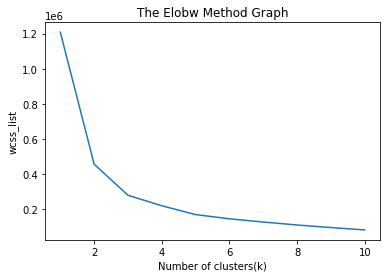

In [6]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()

In [10]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)
x

array([[ 89,  89],
       [ 95,  83],
       [100,  94],
       ...,
       [100,  61],
       [100,  89],
       [ 86,  14]])

In [9]:
y_predict

array([2, 2, 0, ..., 3, 0, 4], dtype=int32)

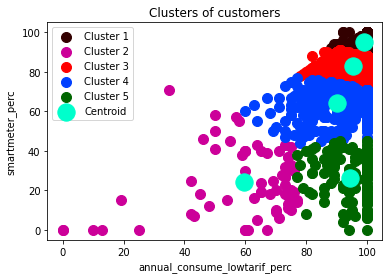

In [12]:
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = '#330000', label = 'Cluster 1')  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = '#cc0099', label = 'Cluster 2')
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = '#ff0000', label = 'Cluster 3')
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = '#0040ff', label = 'Cluster 4')
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = '#006600', label = 'Cluster 5')
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = '#00ffcc', label = 'Centroid')   
mtp.title('Clusters of customers')  
mtp.xlabel('annual_consume_lowtarif_perc')  
mtp.ylabel('smartmeter_perc')  
mtp.legend()  
mtp.show()
